# Método de Runge-Kutta aplicado al sistema de Lorenz


## 1. Librerias necesarias para el análisis

In [28]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Definición del sistema de Lorenz

Se define una función llamada lorenz_system que representa el sistema de ecuaciones diferenciales del atractor de Lorenz. Esta función toma como argumentos los valores actuales de $(x, y, z)$ y los parámetros del sistema $(\sigma, \rho, \beta)$, y devuelve las derivadas correspondientes $(\dot{x}, \dot{y}, \dot{z})$.

Las ecuaciones que se implementan son:

\[
\begin{aligned}
\dot{x} &= \sigma (y - x) \\
\dot{y} &= x (\rho - z) - y \\
\dot{z} &= x y - \beta z
\end{aligned}
\]



In [29]:
def lorenz_system(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

## 3. Implementación del Método de Runge-Kutta de Cuarto Orden (RK4)

La siguiente función runge_kutta_4 implementa el método RK4 para sistemas tridimensionales como el de Lorenz. A continuación se explican los componentes de la función:

#### Parámetros de entrada:
- $x_0, y_0, z_0$: condiciones iniciales.
- $t_0, t_f$: tiempo inicial y final de simulación.
- $h$: tamaño de paso.
- $\sigma, \rho, \beta$: parámetros del sistema de Lorenz.

#### Pasos del método:
1. Se calcula el número total de pasos con $n = \frac{t_f - t_0}{h}$.
2. Se inicializan vectores `x`, `y`, `z` con ceros para almacenar la trayectoria.
3. En cada iteración se calculan los valores intermedios $k_1, k_2, k_3, k_4$ para cada variable del sistema usando `lorenz_system`.
4. Se actualizan los valores de $x_{n+1}, y_{n+1}, z_{n+1}$ usando la fórmula de Runge-Kutta de cuarto orden:

\[
\begin{aligned}
x_{n+1} &= x_n + \frac{h}{6}(k_{1x} + 2k_{2x} + 2k_{3x} + k_{4x}) \\
y_{n+1} &= y_n + \frac{h}{6}(k_{1y} + 2k_{2y} + 2k_{3y} + k_{4y}) \\
z_{n+1} &= z_n + \frac{h}{6}(k_{1z} + 2k_{2z} + 2k_{3z} + k_{4z})
\end{aligned}
\]

#### Valor de retorno:
La función devuelve los vectores `t`, `x`, `y`, `z` que contienen la evolución del sistema a lo largo del tiempo.


In [30]:
def runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n+1)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)

    x[0], y[0], z[0] = x0, y0, z0

    for i in range(n):
        dx1, dy1, dz1 = lorenz_system(x[i], y[i], z[i], sigma, rho, beta)
        dx2, dy2, dz2 = lorenz_system(
            x[i] + h * dx1 / 2, y[i] + h * dy1 / 2, z[i] + h * dz1 / 2, sigma, rho, beta)
        dx3, dy3, dz3 = lorenz_system(
            x[i] + h * dx2 / 2, y[i] + h * dy2 / 2, z[i] + h * dz2 / 2, sigma, rho, beta)
        dx4, dy4, dz4 = lorenz_system(
            x[i] + h * dx3, y[i] + h * dy3, z[i] + h * dz3, sigma, rho, beta)

        x[i+1] = x[i] + (h / 6) * (dx1 + 2 * dx2 + 2 * dx3 + dx4)
        y[i+1] = y[i] + (h / 6) * (dy1 + 2 * dy2 + 2 * dy3 + dy4)
        z[i+1] = z[i] + (h / 6) * (dz1 + 2 * dz2 + 2 * dz3 + dz4)

    return t, x, y, z


## 4. Simulación del Caso 1

En este primer caso, se utilizan los parámetros más conocidos del sistema de Lorenz, que generan un comportamiento caótico clásico:

- $\sigma = 10$
- $\rho = 28$
- $\beta = \frac{8}{3}$
- Condiciones iniciales: $x_0 = y_0 = z_0 = 1$
- Intervalo de integración: $t \in [0, 40]$
- Paso de integración: $h = 0.01$

Se utilizará el método de Runge-Kutta de cuarto orden (RK4) para simular este sistema y graficar las variables $x(t)$, $y(t)$ y $z(t)$, así como su trayectoria tridimensional.

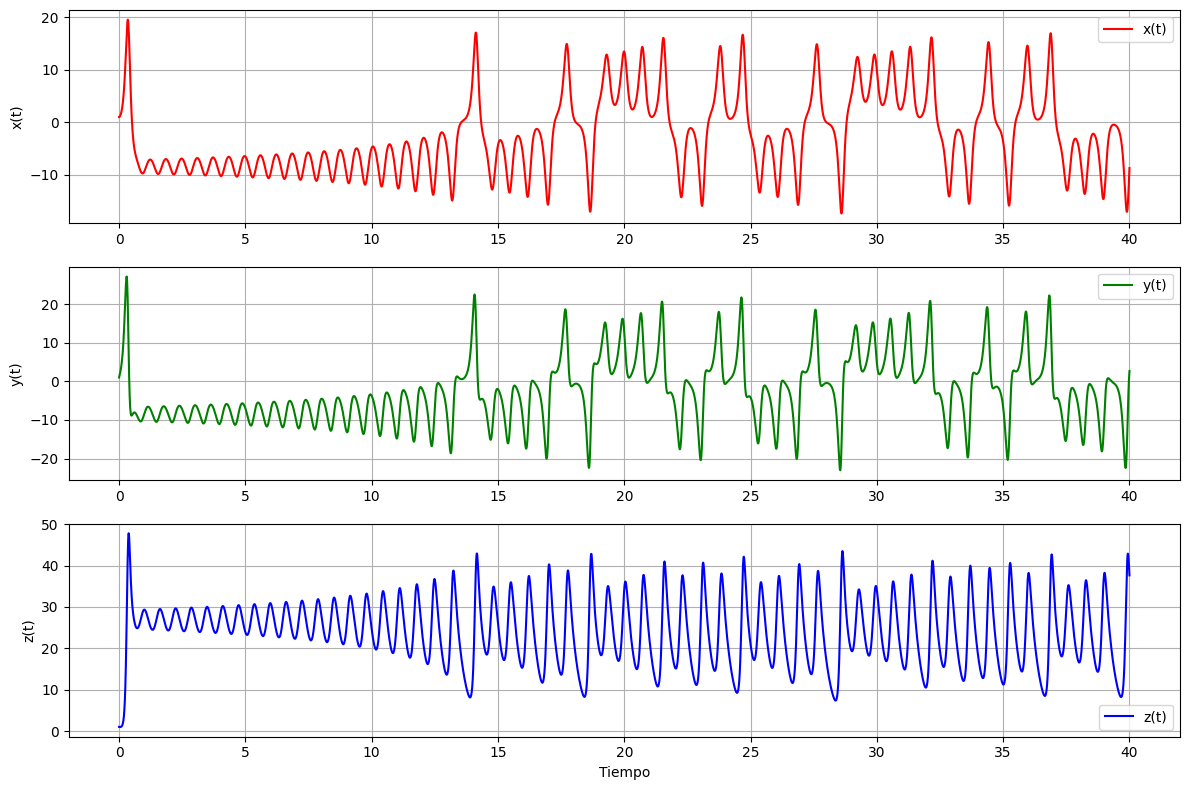

In [31]:
sigma = 10
rho = 28
beta = 8 / 3
x0 = y0 = z0 = 1
t0 = 0
tf = 40
h = 0.01
n = int((tf - t0) / h)

t, x, y, z = runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, color='red', label='x(t)')
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y, color='green', label='y(t)')
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, z, color='blue', label='z(t)')
plt.xlabel("Tiempo")
plt.ylabel("z(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 4.1 Resultados de las componentes $x(t)$, $y(t)$ y $z(t)$

Las gráficas muestran la evolución temporal de las tres variables del sistema de Lorenz para el Caso 1, resuelto con el método de Runge-Kutta de cuarto orden (RK4):

- La función $x(t)$ (en rojo) presenta oscilaciones que rápidamente se vuelven caóticas, con picos irregulares y sin un patrón repetitivo claro. Esto es característico del comportamiento sensible a condiciones iniciales.
  
- La función $y(t)$ (en verde) sigue una dinámica similar a $x(t)$.

- La función $z(t)$ (en azul) muestra un crecimiento rápido en los primeros instantes. Aunque es visualmente más estable, $z(t)$ también forma parte del comportamiento caótico.

Este tipo de comportamiento no periódico, no lineal y altamente sensible es una evidencia clara de la dinámica caótica del atractor de Lorenz bajo las condiciones clásicas de este caso.


### 4.2 Visualización tridimensional del atractor

A continuación se muestra la trayectoria del sistema de Lorenz en el espacio tridimensional $(x, y, z)$ para los parámetros del Caso 1. Esta visualización permite observar la naturaleza caótica del sistema.

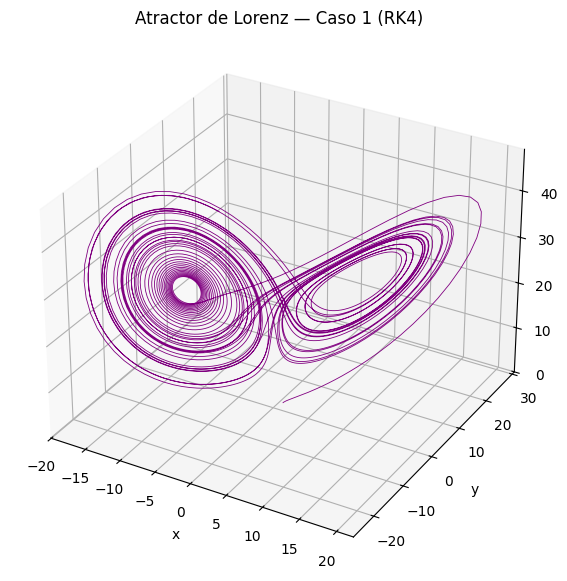

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='purple', lw=0.6)
ax.set_title("Atractor de Lorenz — Caso 1 (RK4)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

## 5 Simulación del Caso 2

En este segundo caso se utilizan los **mismos parámetros** que en el Caso 1, pero se cambian las condiciones iniciales para estudiar cómo la dinámica del sistema responde a pequeñas variaciones:

- $\sigma = 10$
- $\rho = 28$
- $\beta = \frac{8}{3}$
- Condiciones iniciales: $x_0 = 1.002025$, $y_0 = 0.2$, $z_0 = 0.4$
- Intervalo de integración: $t \in [0, 40]$
- Paso de integración: $h = 0.01$


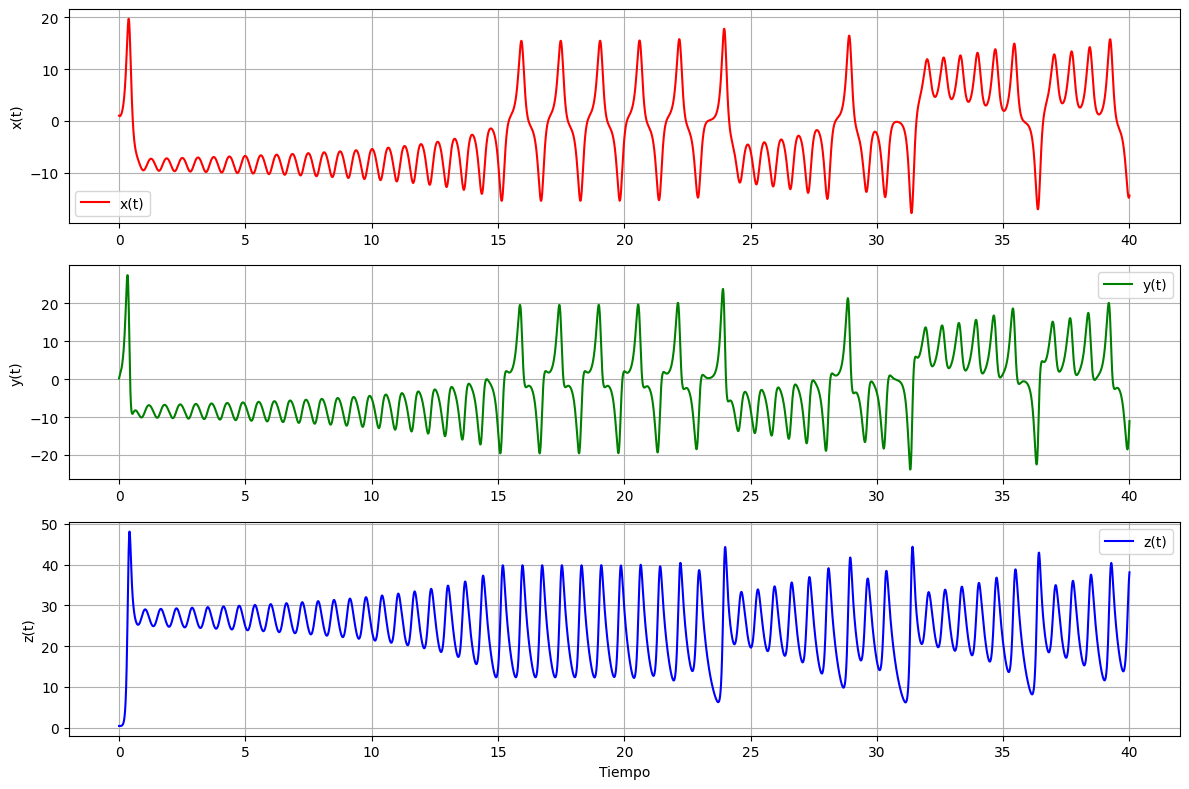

In [33]:
# Parámetros y condiciones del Caso 2
sigma = 10
rho = 28
beta = 8 / 3
x0 = 1.002025
y0 = 0.2
z0 = 0.4
t0 = 0
tf = 40
h = 0.01
n = int((tf - t0) / h)

# Ejecutar simulación
t, x, y, z = runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta)

# Gráficas x(t), y(t), z(t)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, color='red', label='x(t)')
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y, color='green', label='y(t)')
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, z, color='blue', label='z(t)')
plt.xlabel("Tiempo")
plt.ylabel("z(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 5.1 Análisis de las componentes $x(t)$, $y(t)$ y $z(t)$ Caso 2

Aunque los parámetros del sistema de Lorenz se mantuvieron idénticos a los del Caso 1, se modificaron ligeramente las condiciones iniciales: $x_0 = 1.002025$, $y_0 = 0.2$, $z_0 = 0.4$. Este pequeño cambio provoca una evolución completamente distinta de las funciones $x(t)$, $y(t)$ y $z(t)$, lo cual evidencia el carácter caótico del sistema.

#### Análisis de $x(t)$

La función $x(t)$ muestra una oscilación inicial diferente respecto al Caso 1. Aunque su estructura general sigue siendo caótica y sin patrón periódico, se observan diferencias en la forma, frecuencia y ubicación de los picos. Esto refuerza el hecho de que el sistema es altamente sensible a variaciones pequeñas en los valores iniciales.

#### Análisis de $y(t)$

La función $y(t)$ refleja un comportamiento muy similar al de $x(t)$, pero desplazado en magnitud y con mayor asimetría. Se observan períodos de oscilación amortiguada seguidos por picos más marcados, que indican transiciones rápidas entre regiones del espacio fase. 

#### Análisis de $z(t)$

La variable $z(t)$ inicia con un crecimiento. A partir de ahí, entra en una zona de oscilaciones caóticas. La evolución de $z$ es más suave visualmente, pero también responde de forma drástica al pequeño cambio inicial, lo que demuestra que todo el sistema está afectado globalmente.


El análisis de las tres variables demuestra de forma contundente que el sistema de Lorenz **no es estable bajo cambios pequeños en condiciones iniciales**. Este es un claro ejemplo del principio de la **sensibilidad a condiciones iniciales** o "efecto mariposa", característico de los sistemas dinámicos caóticos.


### 5.2 Trayectoria tridimensional del atractor

Se muestra la trayectoria del sistema de Lorenz en el espacio $(x, y, z)$ para el Caso 2. A pesar de que los parámetros son los mismos que en el Caso 1, el cambio leve en las condiciones iniciales genera una trayectoria distinta, lo cual demuestra el carácter caótico del sistema.

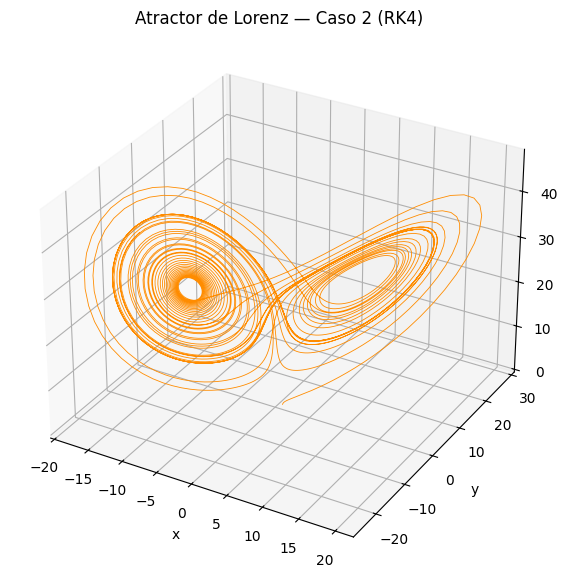

In [34]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='darkorange', lw=0.6)
ax.set_title("Atractor de Lorenz — Caso 2 (RK4)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


## 6.1 Simulación del Caso 3

En este tercer caso se cambian los parámetros del sistema de Lorenz, así como las condiciones iniciales. Esto permitirá observar cómo varía el comportamiento del sistema ante un cambio estructural y no solo de condiciones iniciales:

- $\sigma = 9$
- $\rho = 18$
- $\beta = \frac{10}{3}$
- Condiciones iniciales: $x_0 = 2$, $y_0 = 0.009$, $z_0 = 0.7$
- Intervalo de integración: $t \in [0, 40]$
- Paso de integración: $h = 0.01$


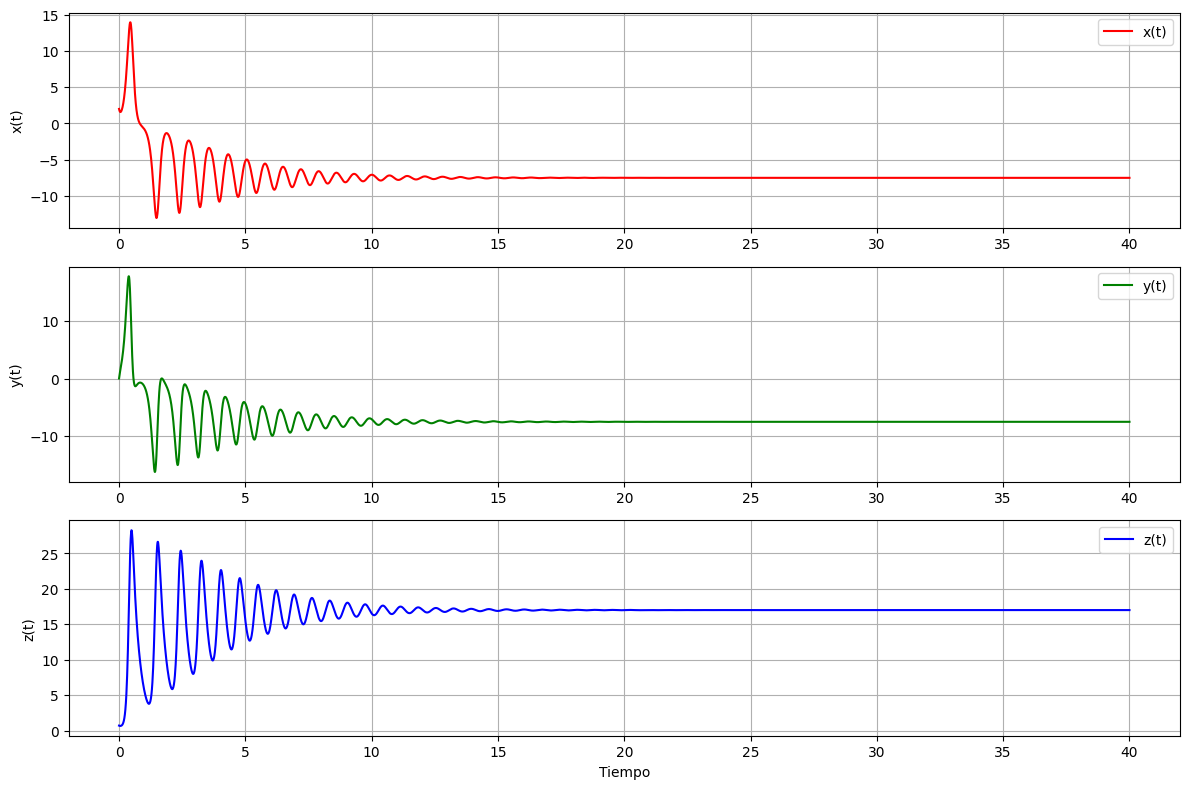

In [35]:
# Parámetros del Caso 3 
sigma = 9
rho = 18
beta = 10 / 3
x0 = 2
y0 = 0.009
z0 = 0.7
t0 = 0
tf = 40
h = 0.01
n = int((tf - t0) / h)

# Simulación con RK4
t, x, y, z = runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta)

# Gráficas x(t), y(t), z(t)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, color='red', label='x(t)')
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y, color='green', label='y(t)')
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, z, color='blue', label='z(t)')
plt.xlabel("Tiempo")
plt.ylabel("z(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 6.1 Análisis de las componentes $x(t)$, $y(t)$ y $z(t)$  Caso 3

En este caso, al modificar los **parámetros estructurales** del sistema de Lorenz ($\sigma = 9$, $\rho = 18$, $\beta = \frac{10}{3}$), el comportamiento del sistema cambia notablemente en comparación con los casos anteriores. Se observan diferencias significativas en las trayectorias de $x(t)$, $y(t)$ y $z(t)$.

#### Análisis de $x(t)$

La función $x(t)$ inicia con una oscilación pronunciada y luego entra en una serie de oscilaciones amortiguadas que tienden a estabilizarse rápidamente cerca de un valor constante negativo. Esto indica que el sistema está perdiendo energía y acercándose a un punto de equilibrio.

#### Análisis de $y(t)$

La variable $y(t)$ sigue una dinámica muy similar a $x(t)$, aunque con un valor de estabilización diferente. Al igual que $x(t)$, sus oscilaciones se reducen rápidamente y desaparecen alrededor de $t \approx 20$, lo que sugiere que el sistema converge hacia un estado estable.

#### Análisis de $z(t)$

A diferencia de $x(t)$ y $y(t)$, la función $z(t)$ muestra una convergencia hacia un valor positivo constante, luego de un conjunto de oscilaciones decrecientes. Esta estabilización en $z$ indica que el sistema ha dejado de presentar el comportamiento caótico de los casos anteriores.


Este caso muestra que al modificar adecuadamente los parámetros $\sigma$, $\rho$ y $\beta$, el sistema de Lorenz puede **perder su carácter caótico** y **tender a un punto de equilibrio estable**. A diferencia de los casos 1 y 2 donde el sistema nunca se estabiliza, en este caso el sistema converge hacia una solución estacionaria. Esta observación es fundamental para comprender cómo el **caos en Lorenz no depende solo de condiciones iniciales**, sino también de los **valores críticos de los parámetros del sistema**.


### 6.2 Trayectoria tridimensional del atractor

Con los nuevos parámetros y condiciones iniciales, se espera que el sistema presente un comportamiento diferente al observado en los casos anteriores. A continuación se muestra la trayectoria del sistema en el espacio $(x, y, z)$.

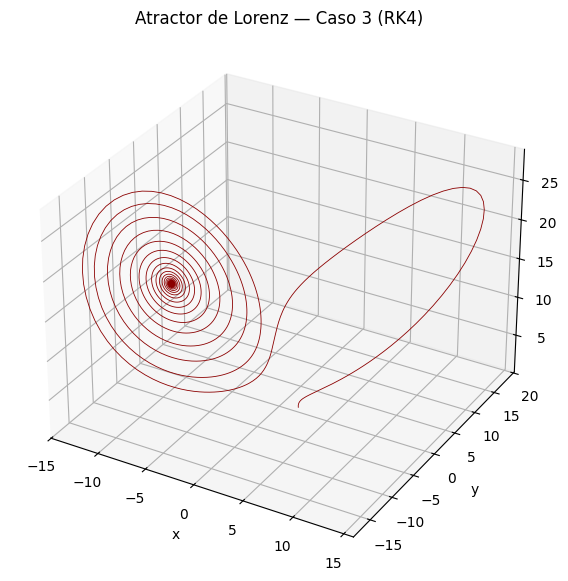

In [36]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='darkred', lw=0.6)
ax.set_title("Atractor de Lorenz — Caso 3 (RK4)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


## 7 Comparación de métodos: Euler vs Runge-Kutta de cuarto orden (RK4)

#### ¿Cuál método es más adecuado para simular el sistema de Lorenz?

El método de **Runge-Kutta de cuarto orden (RK4)** es claramente **más adecuado** para simular el sistema de Lorenz que el **método de Euler**, debido a su mayor precisión, estabilidad y comportamiento más realista frente a sistemas caóticos. 


#### Comportamiento caótico típico

- **Método de Euler:** muestra trayectorias irregulares con **saltos bruscos** y **comportamientos poco naturales**. El atractor se ve distorsionado y no conserva su forma esperada.
- **RK4:** reproduce el comportamiento caótico del sistema Lorenz con **trayectorias suaves**, coherentes y bien definidas.

#### Sensibilidad a condiciones iniciales

- **Euler:** debido a su baja precisión, **el error crece rápidamente**, generando trayectorias que se desvían significativamente.
- **RK4:** mantiene la fidelidad del sistema incluso con **ligeras variaciones** en las condiciones iniciales, permitiendo observar con claridad la sensibilidad caótica del sistema.


#### Comparación

En cuanto a precisión, el método de Euler presenta un error local de orden \( O(h^2) \), lo que lo hace menos confiable para fenómenos caóticos. En contraste, RK4 tiene un error local de orden \( O(h^5) \), siendo mucho más preciso. En términos de estabilidad numérica, RK4 es considerablemente más estable que Euler, especialmente en simulaciones prolongadas. 

Además, el método de Euler es muy sensible a pequeñas perturbaciones en las condiciones iniciales, lo que hace que su comportamiento sea inconsistente. Por el contrario, RK4 es más robusto ante estas variaciones, preservando la estructura del atractor. También se observa que RK4 representa el atractor de Lorenz con mayor claridad y fidelidad geométrica, mientras que Euler tiende a distorsionar su forma. Aunque RK4 tiene un costo computacional moderadamente más alto, este es justificable considerando la mejora sustancial en los resultados.


### Conclusión final

**El método de Runge-Kutta de cuarto orden es más adecuado para simular el sistema de Lorenz**, ya que ofrece una mejor aproximación a la dinámica del sistema, captura con mayor fidelidad su comportamiento caótico, y requiere un número razonable de pasos para obtener resultados precisos y estables.
